In [2]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

df = pd.read_csv('/content/drive/MyDrive/cakd8/강의/TSLA.csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,17.481333,17.533333,17.188000,17.276667,17.276667,39163500
1,2015-07-13,17.483334,17.503332,17.070000,17.477333,17.477333,44404500
2,2015-07-14,17.473333,17.732668,17.367332,17.709999,17.709999,28614000
3,2015-07-15,17.782667,17.832666,17.472000,17.542667,17.542667,30324000
4,2015-07-16,17.614668,17.813334,17.544001,17.778667,17.778667,24240000


In [2]:
df.shape

(1259, 7)

In [3]:
training_set = df.iloc[:800,1:2].values
test_set = df.iloc[800:,1:2].values

https://velog.io/@lazy_learner/LSTM-%EC%8B%9C%EA%B3%84%EC%97%B4-%EC%98%88%EC%B8%A1-%EB%AA%A8%EB%93%88-%EB%A7%8C%EB%93%A4%EA%B8%B0-1


In [4]:
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []

# time-steps : 60, output : 1

for i in range(60,800):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [8]:
print(y_train[0]) # 첫번째 y값 인덱스 61
X_train[1][-1] # 두번째 X_train 인덱스 1 ~ 61

0.3997217416156186


array([0.39972174])

In [5]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer = 'adam', loss='mean_squared_error')

In [6]:
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
24/24 [==============================] - 10s 11ms/step - loss: 0.0695
Epoch 2/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0135
Epoch 3/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0100
Epoch 4/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0101
Epoch 5/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0108
Epoch 6/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0100
Epoch 7/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0095
Epoch 8/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0085
Epoch 9/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0090
Epoch 10/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0084
Epoch 11/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0087
Epoch 12/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0087
Epoch 13/100
24/24 [====

In [8]:
# 테스트 데이터 준비

dataset_train = df.iloc[:800,1:2]
dataset_test = df.iloc[800:,1:2]

dataset_total = pd.concat((dataset_train,dataset_test),axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)

X_test = []
for i in range(60,519):
  X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)


(459, 60, 1)


In [9]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

15/15 [==============================] - 1s 5ms/step


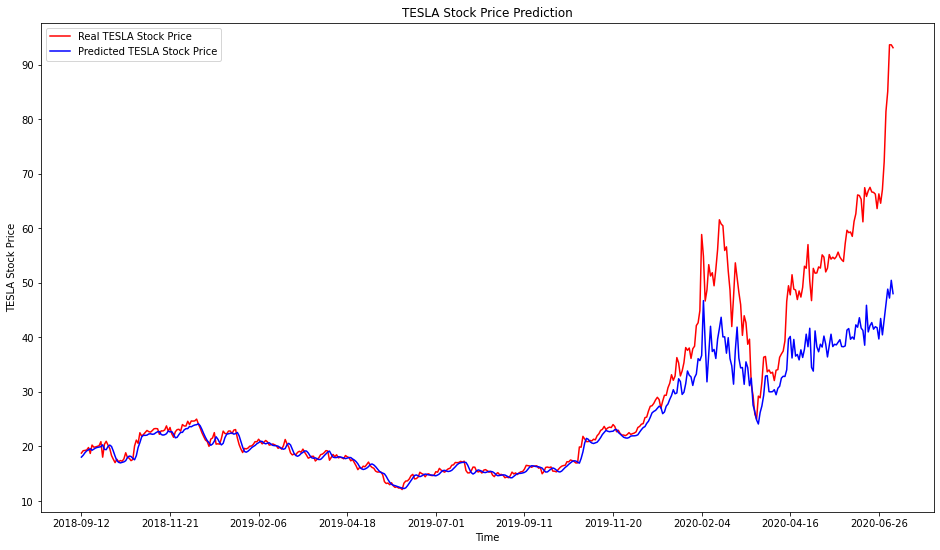

In [10]:
# 시각화
plt.figure(figsize=(16,9))
plt.plot(df.loc[800:,'Date'],dataset_test.values, color='red',label='Real TESLA Stock Price')
plt.plot(df.loc[800:,'Date'],predicted_stock_price,color='blue',label='Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()